# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [13]:
# Why Seaborn?
# - more attractive plots
# - more options of statistical plots

# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.


In [14]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
df = sns.load_dataset('tips')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
df.shape

(244, 7)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [19]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [20]:
#Numerical Data Plotting
#relplot has options of plotting both categorical and numerical data
#relplot: how the relationship between two variables 
#relplot: relationship plot


df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


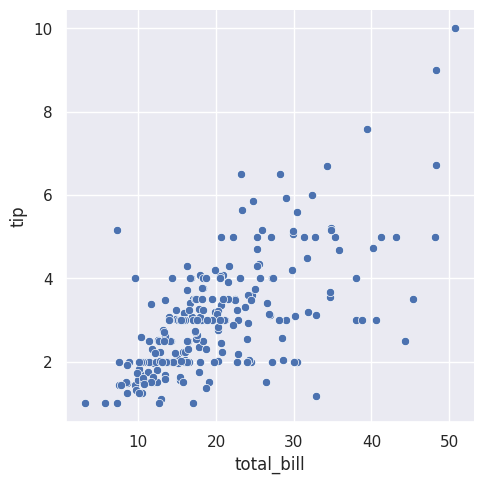

In [22]:
#how tip is varying wrt total_bill >> scatterplot/by default relplot makes scatter plot

sns.relplot(x = 'total_bill', y='tip', data = df) #relationship between two variables, by default it gives scatter plot, kind = 'line'

#Insight: as total bill increses tip increases

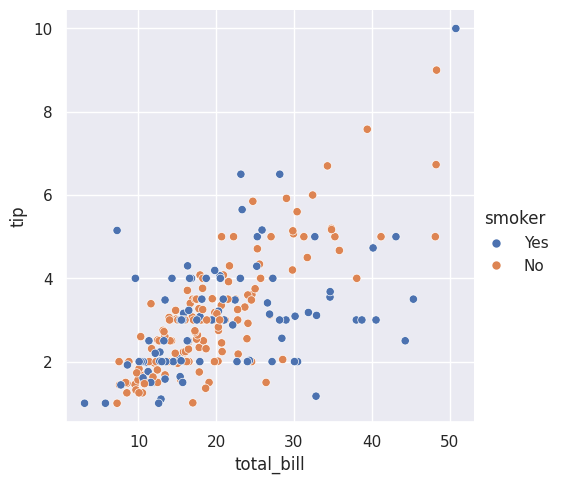

In [23]:
sns.relplot(x = 'total_bill', y='tip', data = df, hue = 'smoker') #hue gives the different colour shaded
#Insight: customer who smoked gave the highest tip

In [24]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

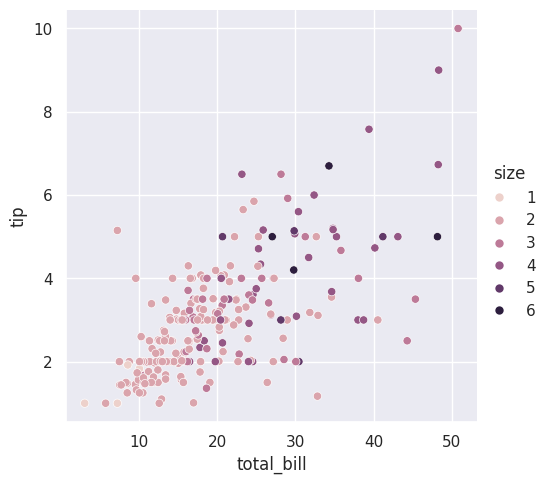

In [25]:
sns.relplot(x = 'total_bill', y='tip', data = df, hue = 'size')

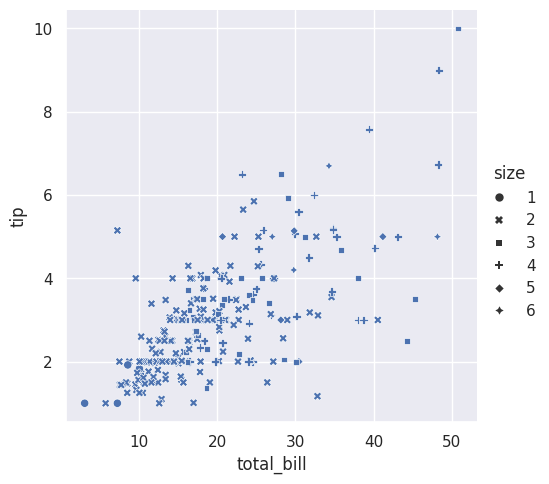

In [26]:
sns.relplot(x = 'total_bill', y='tip', data = df, style = 'size') #style gives the different representation of  columns value

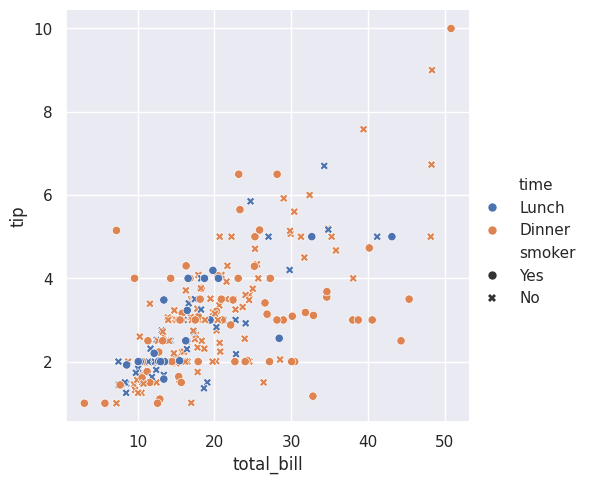

In [27]:
sns.relplot(x = 'total_bill', y='tip', data = df, style = 'smoker', hue = 'time')

In [28]:
#relplot for making a line plot: generating a data
#Line Plot: to understand the trend in data, a time column/sequence is generally is there  

In [29]:
time = np.arange(500)
value = np.random.randn(500).cumsum()
df = pd.DataFrame({'time': time, 'value': value})
df

,time,value
0,0,-0.215686
1,1,-0.814445
2,2,-1.157723
3,3,-1.437336
4,4,-2.117254
...,...,...
495,495,8.720719
496,496,7.756390
497,497,8.648073
498,498,8.315569


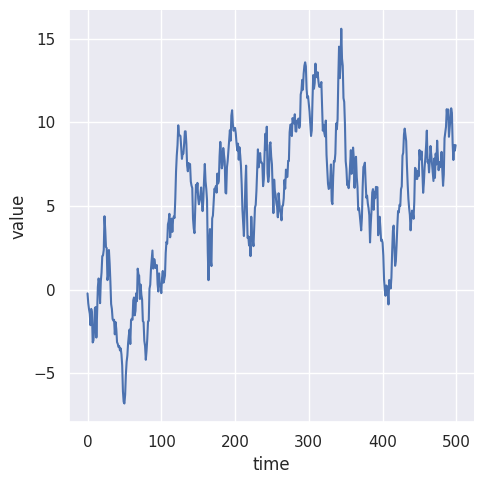

In [30]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [32]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


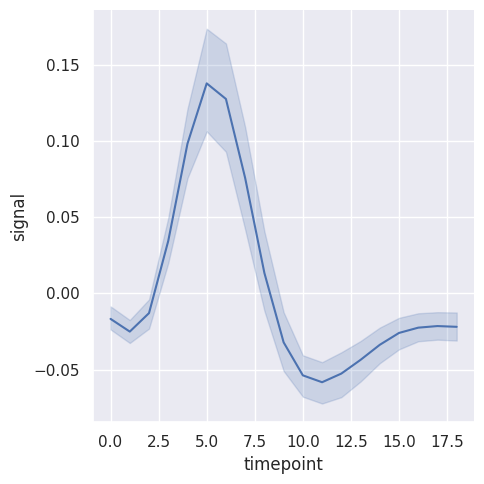

In [33]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri)

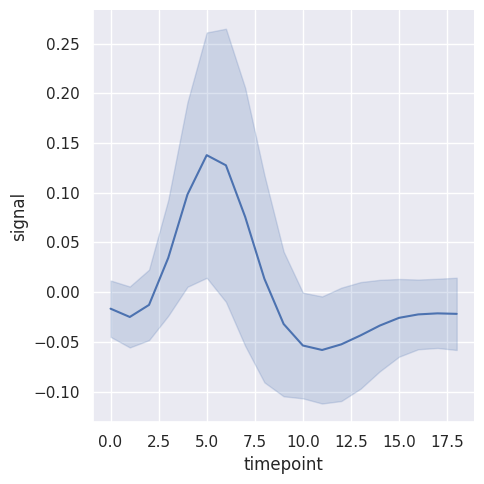

In [34]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, ci = 'sd') #ci: Confedence Internal (range/between), sd:Standard Deviation

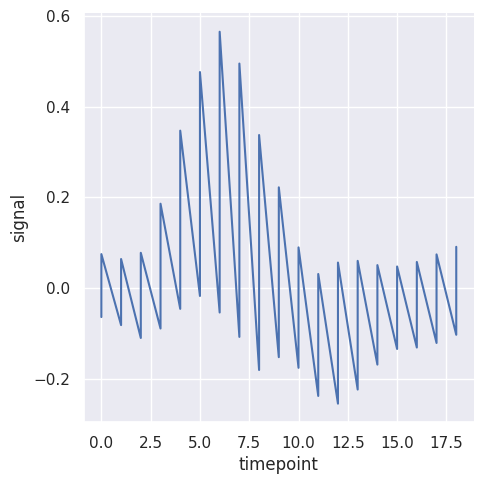

In [35]:
sns.relplot(x = 'timepoint', y = 'signal',estimator = None, kind = 'line', data=fmri, ci = 'sd')

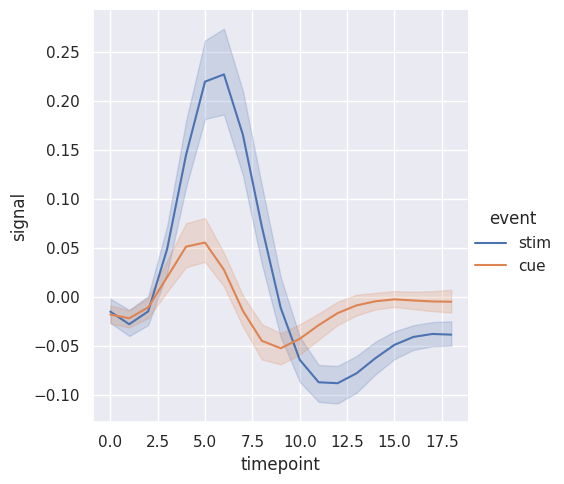

In [36]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, hue = 'event')

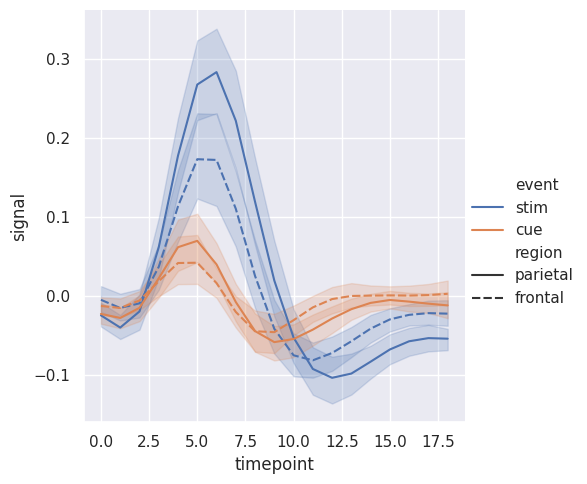

In [37]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, hue = 'event', style = 'region')

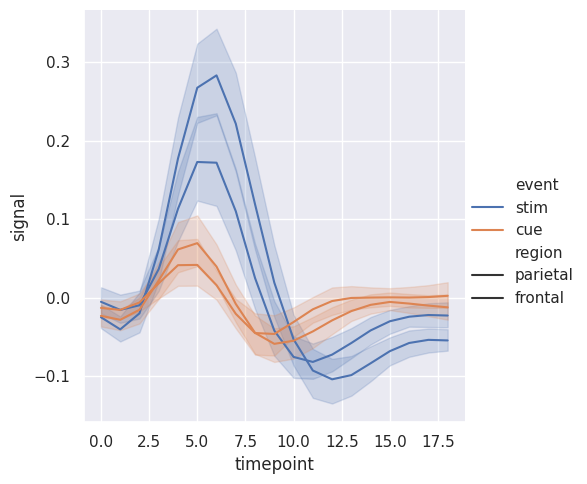

In [38]:
#removes the dashes in line chart>>dashes=False
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, hue = 'event', style = 'region', dashes = False)

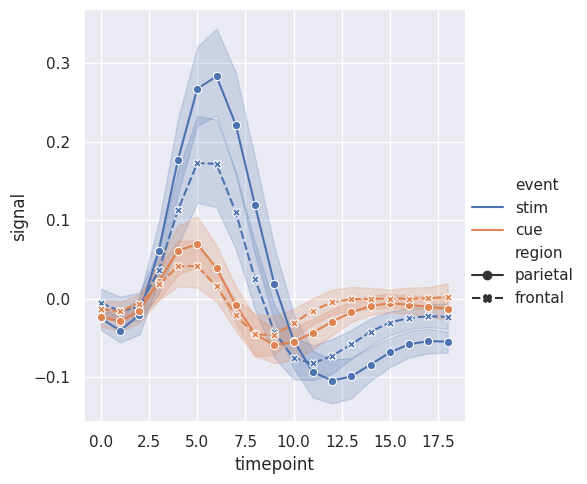

In [39]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, hue = 'event', style = 'region', markers = True)

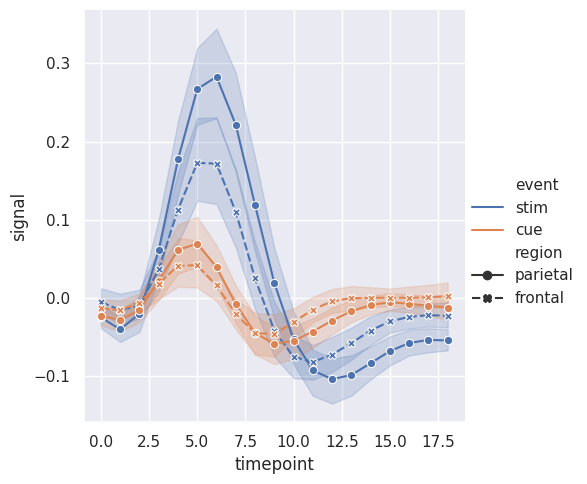

In [40]:
sns.relplot(x = 'timepoint', y = 'signal',kind = 'line', data=fmri, hue = 'event', style = 'region', markers = True)